# Lesson 6

We will be examining data exploration techniques and feature selection methodologies.

**Goal**

After this lesson, you should:
1. Understand *recall* and *precision*
1. Understand detection and removal of *outliers*. 
1. Understand the following feature selection algorithms:
    - *univariate selection*
    - *recursive feature elimination (RFE)*


In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [10,5]

### Validation
We've already explore the concept of validating our models and testing our various models against themselves. We've explored ROC curves and cross validation in our previous lessons. Today, we will explore *recall precision plots*, which will further help us understand the performance of our model.

> Imagine I claimed to have a model which can predict whether an acre of land will catch fire within the United States with > 99% accuracy. Since wildfires are a major cause for concern and a significant expense for the federal and state governments, this model would really help disaster planning efforts. In order to acheive this model, I simply label every acre in the United States as *NOT_AT_RISK*. Since there are ~2.3 billion acres of land in the United States, and in 2017 there were almost 2 million acres which caught fire, my model is accurate 99.99% of the time.

Would you buy my model?

#### Recall vs Precision

In the above case, our data is highly *imbalanced*. Can you think of other imbalanced classification problems in real life?

Intuitively, we know the above model is bad because it predicts too real cases given all possible correctly identified true predictions and all "missed" true predictions. We can further develop this idea with the concept of **recall**:

$$
    R = \frac{\#TP}{\#TP + \#FN}
$$

> Of those classified as AT_RISK, what proportion actually caught fire?


What would our recall be for the wildfire model above?

---

In addition to **recall**, we also want to develop the intuition that it's extremely unhelpful to label the entire United States as *AT_RISK* simply to increase our recall. This would be just as unhelpful since we can't actually use the model for anything useful. In other words, how many predictions were actually relevant?

$$
    P = \frac{\#TP}{\#TP + \#FP}
$$

> Of those that actually caught fire, what proportion were identified?

It becomes clear that our more useless model now has fewer relevant data points.

<img src="https://i.stack.imgur.com/T0kQr.png">

Questions:
    - Can you think of situations where we want to optimize either for greater precision OR greater recall?
    - How does an ROC Curve differ from a Precision vs Recall curve?


#### F1 Score

The F1 score helps us capture how "good" of a balance we have between precision and recall.

Why can't we just take the average of our precision and recall scores?

$$
    F1 = 2*\frac{P*R}{P+R}
$$

When building a classifier, we want to optimize our $F1$ score in order to achive a balanced classifier.

In [2]:
from sklearn.metrics import f1_score

# build a model 
y_test = np.array([0,1,2,1,3,2,1,0])

# model.fit(X,y)
# y_pred = model.predict(y_test)
y_pred = np.array([0,3,2,1,2,2,1,0])

f1_score(y_test,y_pred,average='weighted')

0.75

In [3]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7916666666666666, 0.75, 0.75, None)

### Data Exploration

As we've seen, the bulk of machine learning lies in the preparation and exploration of our initial data. Whenever we begin a new problem, we need to fully understand *exactly* what we are doing. This requires gaining domain knowledge, examining specific features, and getting a "feel" for our data.

The general steps in data exploration are as follows:

> Garbage in, Garbage out

1. identify our features
1. examine each feature
1. examine the relationships between different feature pairs
1. handle any bad data
    - missing values
    - outliers
    - mislabled values
1. feature engineering, which may entail creating new features

Let's pull in a data set and explore each stage.

In [4]:
raw = pd.read_csv('./data/train_users_2.csv')

# First, let's identify our features...
raw.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


#### Univariate Analysis

**Univariate Analysis** is just a fancy word that refers to exploring a single feature.

We consider *categorical* and *continuous* variables.

Continuous variable analysis is primarily about exploring the central tendency of the distribution. What does this mean, and how might we do it?

We've already seen ways to explore categorical variables. Can you think of a method of exploring a categorical variable?

In [5]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp_first_active,213451.0,2.013085e+13,9.253717e+09,2.009032e+13,2.012123e+13,2.013091e+13,2.014031e+13,2.014063e+13
age,125461.0,4.966834e+01,1.556666e+02,1.000000e+00,2.800000e+01,3.400000e+01,4.300000e+01,2.014000e+03
signup_flow,213451.0,3.267387e+00,7.637707e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01


#### Bivariate Analysis
**Bivariate Analysis** just means exploring the relationship between two features

We already know one geometric technique: scatter plots! However, we also know that, even if a scatter plot indicates some relationship between two variables, it cannot measure the strength of that relationship. In order to measure "strength

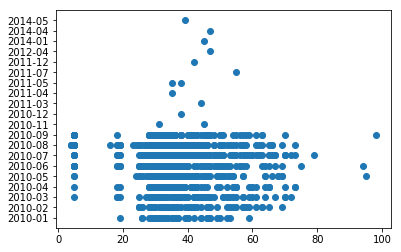

In [6]:
a = raw[['age','date_account_created']]
a = a.dropna()
a = a[a.age < 100]

b = a.head(1000).sort_values(by=['date_account_created'])
a = b.age
t = b['date_account_created'].map(lambda x: x[:7])

plt.scatter(a,t)

In order to explore relationship between two categorial variables, we can use:
- frequency tables
- countplots
- stacked bar charts
- [chi-square test](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.chisquare.html)

We can also explore the relationship between continuous and categorial variables, but that is beyond our scope.

#### Bad Data

Often, we will have missing data in one of our columns. In this event, there are a number of possible ways to handle our bad data. Can you consider a few possible solutions to bad data?

Let's consider two options:
1. Delete the data
    - makes sense if we have random missing values and we can't derive any relationships
1. Make up fake values
    - using central tendency measurements
    - using [KNN models](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
    - using predictive models

#### Outliers
Sometimes, our data will have **outliers**, which are data points that diverge radically from our other observations. This may be due to measurement or experimental error. Often, we would like to remove these erroneous points

<img src="https://ka-perseus-graphie.s3.amazonaws.com/9ac1d984f64c54527ce83a0fcd8f87a20d0d32e5.svg">

Some ways to detect outliers:
1. graphically using plots (e.g. scatter plots or histograms)
1. measuring the number of standard deviations away from the mean (usually 3 or more SD away)
1. compressing our data (e.g eliminating everything beyond 5% from the tails)

Some ways to remove outliers:
1. delete them
1. "categorize" them with the next most extreme value clusters
1. build a separate model for the outliers if there is a significant cluster

#### Feature Engineering

Once we've analysed our data, we can consider adding new features and/or transforming existing features to further build our model. For example, we may perform a `log` transformation and replace an existing feature $f_1$ with $\log(f_1)$. Perhaps this help us smooth outliers or align the distribution in a more meaningful way.

You may also wan to change non-linear relationship into linear relationships. This makes the realtionship easier to understand, but it also requires careful attention to your transformations.

Common methods include:
1. taking the logarithm of a feature (often to reduce some directional skew)
1. binning (e.g. taking values and clumping them together)

<img src="https://i.stack.imgur.com/gd7k9.jpg">

In addition to transformation, we can also create new features. We've already seen a few examples of this in our previous lectures. Can anyone think of reasons we may create new features?

### Feature Selection Algorithms

In addition to careful analysis, we can employ some algorithms to help us select our best features. We've already seen a feature ranking algorithm provided by the properties of Random Forest Classifiers:

`important_features_in_our_forest =` [forest.feature_importances_](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

There are a few other well known algorithms that we may employ:

1. Univariate Selection
2. RFE
3. PCA

In [7]:
raw = pd.read_csv('./data/grades.csv')
raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### Univariate Selection

We can use common statistical tests to help us choose features which have the strongest relationships.

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = raw['admit']
X = raw[['gre','gpa','rank']]

test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X,y)

features = fit.transform(X)

print(fit.scores_)
print(fit.transform(X)[0:3,:])


[308.1688926    0.54140576   8.4233428 ]
[[380.   3.]
 [660.   3.]
 [800.   1.]]


#### Recursive Feature Elimination (RFE)

This technique, intuitively, builds models with progressively fewer subsets of features.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 2)
fit = rfe.fit(X,y)

print(X.columns.values)
print(fit.support_)
print(fit.ranking_)

['gre' 'gpa' 'rank']
[False  True  True]
[2 1 1]
